


https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   



upload this:
mammographic_masses.data.txt 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
DearDataset = pd.read_csv('mammographic_masses(with_Missing).data.txt')
DearDataset.head()

,BI_RADS,age,shapee,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,,1


Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [3]:
DearDataset.severity.unique()    # check all the unique values so you can get rid of them if they are outliers or noise(NaN)

array([1, 0], dtype=int64)

In [4]:
DearDataset.drop(DearDataset[DearDataset.BI_RADS == ' '].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.BI_RADS == 55].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.BI_RADS == 6].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.margin == ' '].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.age == ' '].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.density == ' '].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.shapee == ' '].index, inplace=True)# I named it shapee because "shape" is a func in python

In [5]:
DearDataset

,BI_RADS,age,shapee,margin,density,severity
0,5,67,3,5,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
8,5,57,1,5,3,1
10,5,76,1,4,3,1
...,...,...,...,...,...,...
955,4,47,2,1,3,0
956,4,56,4,5,3,1
957,4,64,4,5,3,0
958,5,66,4,5,3,1


In [6]:
missing_val_count_by_column = (DearDataset.isnull().sum())  ## keep this code to check missing values.
print(missing_val_count_by_column[missing_val_count_by_column > 0])   #none

Series([], dtype: int64)


In [7]:
# its time to separate our TARGET column from dataset!
x_data  = DearDataset.drop('severity',axis=1)
y = DearDataset['severity']
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y,test_size=0.3,shuffle=True) # 30 percent of original data will be Test data


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()# why do i need this? Because we want to "scale" our data

In [10]:
scaler.fit(X_train)

MinMaxScaler()

In [11]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)

In [12]:

X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [13]:
X_train

,BI_RADS,age,shapee,margin,density
99,0.666667,0.181818,0.333333,0.00,0.666667
694,0.666667,0.701299,0.333333,0.00,0.666667
360,0.833333,0.675325,1.000000,0.75,0.666667
166,0.666667,0.636364,0.000000,0.00,0.666667
75,0.666667,0.077922,0.000000,0.00,0.666667
...,...,...,...,...,...
862,0.666667,0.662338,1.000000,0.25,0.333333
119,0.833333,0.844156,1.000000,1.00,0.666667
365,0.666667,0.350649,0.333333,0.00,0.666667
280,0.833333,0.272727,0.000000,0.75,0.666667


In [14]:
x_data["BI_RADS"]

0      5
2      5
3      4
8      5
10     5
      ..
955    4
956    4
957    4
958    5
959    4
Name: BI_RADS, Length: 829, dtype: object

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Load libraries

import pandas as pd
import numpy as np # linear algebra

from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Set random seed
np.random.seed(0)
from keras.models import Sequential
from keras.layers import Dense
import numpy
from keras.layers import Flatten

## Decision Trees


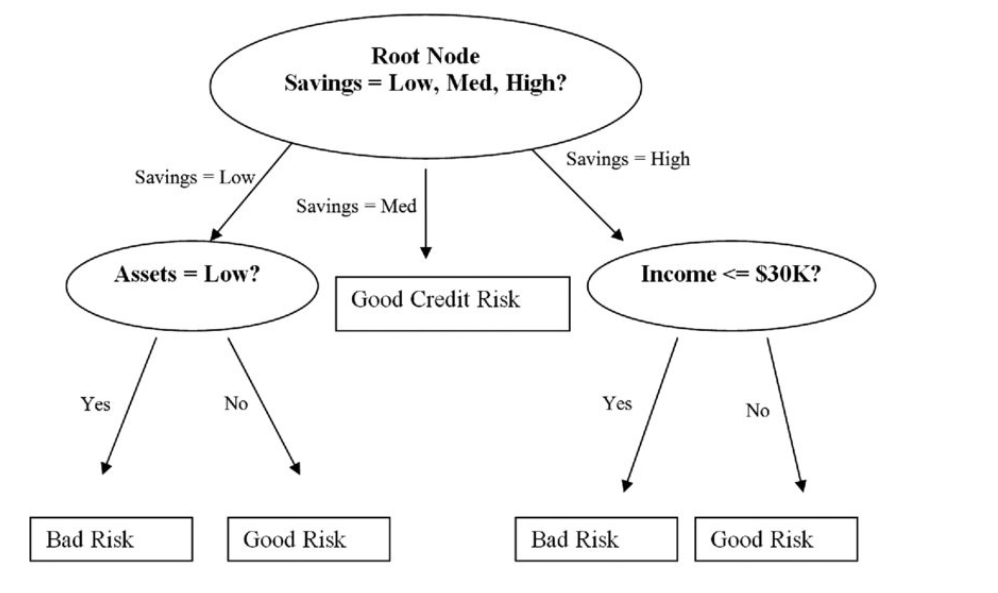

In [16]:
from IPython.display import Image
Image(filename='decisiontree1.png') 

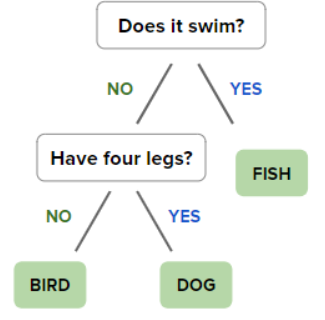

In [17]:
from IPython.display import Image
Image(filename='decisiontree2.png')

In [18]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))

[[96 27]
 [41 85]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       123
           1       0.76      0.67      0.71       126

    accuracy                           0.73       249
   macro avg       0.73      0.73      0.73       249
weighted avg       0.73      0.73      0.73       249



Now create a DecisionTreeClassifier and fit it to your training data.

In [19]:
X_test

,BI_RADS,age,shapee,margin,density
527,0.833333,0.480519,1.000000,0.75,0.666667
941,0.833333,0.506494,0.666667,0.75,0.666667
697,0.666667,0.350649,1.000000,0.75,0.333333
224,0.833333,0.454545,0.333333,0.00,0.666667
747,0.833333,0.558442,1.000000,0.50,0.666667
...,...,...,...,...,...
779,0.666667,0.155844,0.000000,0.00,0.666667
734,0.666667,0.441558,0.000000,0.00,0.666667
516,0.833333,0.740260,1.000000,1.00,0.666667
503,0.666667,0.285714,0.333333,0.00,0.666667


## Random Forest
advantages:
They are based on decision trees that are an extremely easy concept to understand given their highly intuitive nature.
These models do not usually need large amounts of training data to reach a stage where they can predict classes with a high accuracy.
Outliers (and adversarial examples) have a reduced effect on such models as compared to other machine learning models.

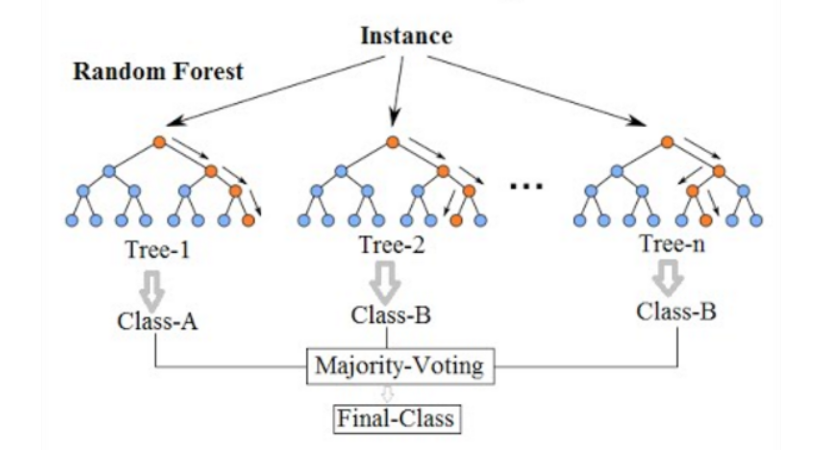

In [20]:
from IPython.display import Image
Image(filename='randomforest1.png') 

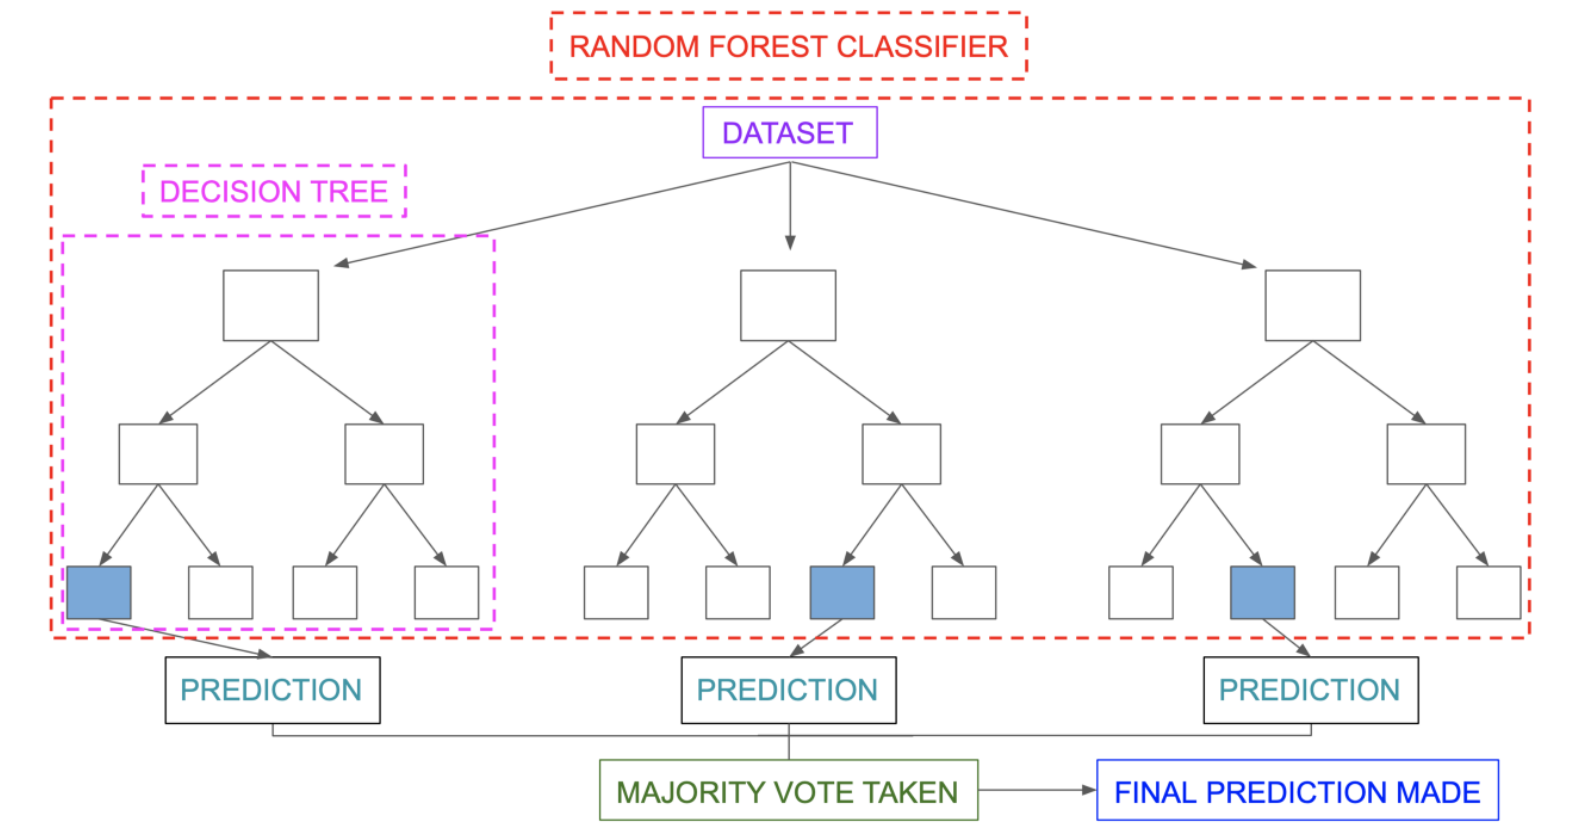

In [21]:
from IPython.display import Image
Image(filename='randomforest2.png') 

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[98 25]
 [33 93]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       123
           1       0.79      0.74      0.76       126

    accuracy                           0.77       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.77      0.77      0.77       249



## SVM

Next try using svm.SVC with a linear kernel. How does it compare to the decision tree?

In [23]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')# binary classification its 0 or 1 , yes or no. Kernel='linear'
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
y_pred = svclassifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[102  21]
 [ 23 103]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       123
           1       0.83      0.82      0.82       126

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



## KNN


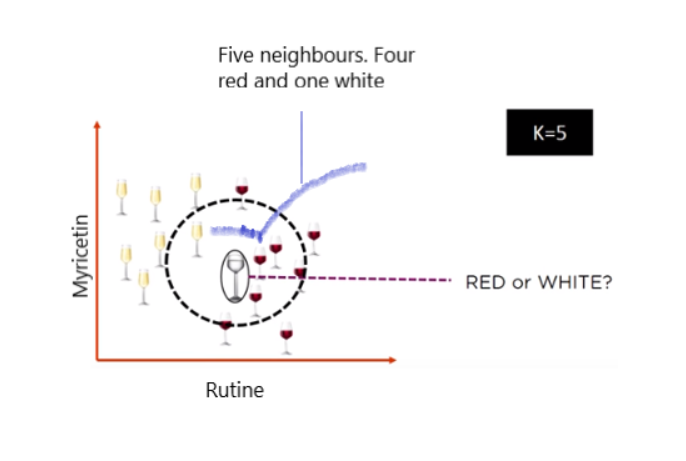

In [26]:
from IPython.display import Image
Image(filename='knn1.png') 

In [27]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,KN_pred))
print(classification_report(y_test,KN_pred))

[[97 26]
 [27 99]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       123
           1       0.79      0.79      0.79       126

    accuracy                           0.79       249
   macro avg       0.79      0.79      0.79       249
weighted avg       0.79      0.79      0.79       249



## Maybe Non-Linear SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is. Do we have a new winner?

In [28]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
y2_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y2_pred))
print(classification_report(y_test,y2_pred))

[[112  11]
 [ 34  92]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       123
           1       0.89      0.73      0.80       126

    accuracy                           0.82       249
   macro avg       0.83      0.82      0.82       249
weighted avg       0.83      0.82      0.82       249



## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [29]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression() 
regr.fit(X_train, y_train) #training the algorithm
Log_pred = regr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,Log_pred))
print(classification_report(y_test,Log_pred))

[[101  22]
 [ 24 102]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       123
           1       0.82      0.81      0.82       126

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



In [30]:
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')
print('SVM:',accuracy_score(y_test, y_pred)*100,'%')
print('Non-Linear SVM', accuracy_score(y_test, y2_pred)*100, '%')
print('Log Ress', accuracy_score(y_test, Log_pred)*100, '%')

Decision Tree: 72.69076305220884 %
Random Forest: 76.70682730923694 %
KNeighbors: 78.714859437751 %
SVM: 82.32931726907631 %
Non-Linear SVM 81.92771084337349 %
Log Ress 81.52610441767068 %




As a bonus challenge, let's see if an artificial neural network can do even better. You can use Keras to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary.

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout  
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(3, input_dim=5, activation='relu'))  # (inputLayerUnits +1) / 2

model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [34]:
model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=200, batch_size=128)


Epoch 1/200
6/6 [==============================] - 1s 40ms/step - loss: 0.6444 - accuracy: 0.6817 - val_loss: 0.6652 - val_accuracy: 0.6108
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6421 - accuracy: 0.6817 - val_loss: 0.6635 - val_accuracy: 0.6108
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6400 - accuracy: 0.6817 - val_loss: 0.6619 - val_accuracy: 0.6059
Epoch 4/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6380 - accuracy: 0.6870 - val_loss: 0.6602 - val_accuracy: 0.6059
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6356 - accuracy: 0.6870 - val_loss: 0.6584 - val_accuracy: 0.6108
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6332 - accuracy: 0.6870 - val_loss: 0.6563 - val_accuracy: 0.6108
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.6897 - val_loss: 0.6544 - val_accuracy: 0.6108
Epoch 8/200
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.4860 - accuracy: 0.7984 - val_loss: 0.5270 - val_accuracy: 0.7635
Epoch 118/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4857 - accuracy: 0.7984 - val_loss: 0.5267 - val_accuracy: 0.7635
Epoch 119/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4855 - accuracy: 0.7984 - val_loss: 0.5260 - val_accuracy: 0.7685
Epoch 120/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4853 - accuracy: 0.7984 - val_loss: 0.5257 - val_accuracy: 0.7685
Epoch 121/200
6/6 [==============================] - 0s 9ms/step - loss: 0.4851 - accuracy: 0.7984 - val_loss: 0.5258 - val_accuracy: 0.7635
Epoch 122/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4846 - accuracy: 0.7984 - val_loss: 0.5255 - val_accuracy: 0.7635
Epoch 123/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4843 - accuracy: 0.7984 - val_loss: 0.5253 - val_accuracy: 0.7635
Epoch 124/200
6/6 [========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


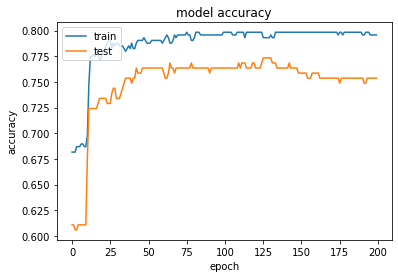

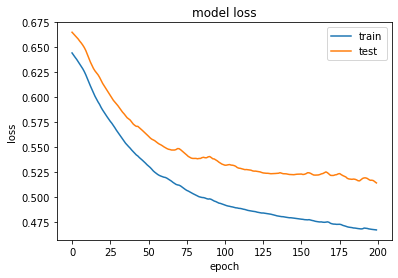

In [35]:
print(model_without_early.history.keys())
# summarize history for accuracy
plt.plot(model_without_early.history['accuracy'])
plt.plot(model_without_early.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_without_early.history['loss'])
plt.plot(model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

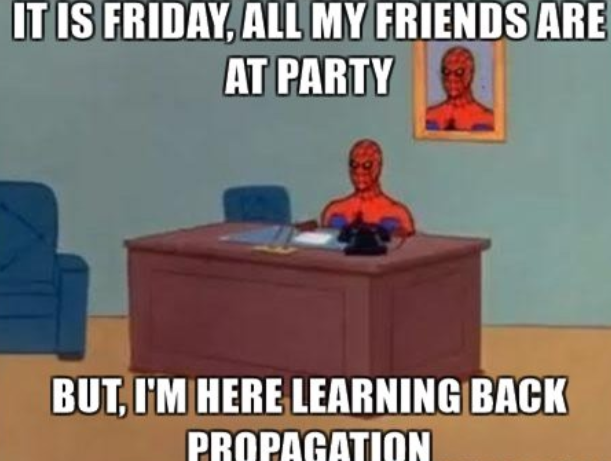

In [36]:
from IPython.display import Image
Image(filename='bp1.png') 